#### ECON107 Python Project
#### Project Title: [Dielectron Collision Analysis in Python]
#### Student Name: [Meliha Delalić]
#### Student ID: [220302150]

## 1. Introduction

##### In this notebook, we are going to analyze the electron-electron collisions as final decay products of numerous intermediate interactions that follow proton-proton collisions at Large Hadron Collider (LHC). The data is collected by Compact Muon Solenoid (CMS) general purpose detector.


## 2. Importing Necessary Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## 3. Data Importing 


##### Since this is a very large dataset, we are only importing the first 10000 rows for simplification and easier data managing purposes.

In [3]:
data = pd.read_csv('dielectron.csv', nrows=10000)

# Inspect the data and information about the columns
print(data.head(5))

      Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920 

## 4. Cleaning Data 

### 4.1. Ensure clear column names

In [4]:
# Check the column names
print(data.columns)

Index(['Run', 'Event', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'],
      dtype='object')


In [52]:
# Remove the space after "px1 "
data.rename(columns = {"px1 ":"px1"}, inplace = True)

# Then check the column names again 
print(data.columns)

Index(['Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M', 'Event_M'],
      dtype='object')


### 4.2. Handle Missing Data

In [6]:
# Get the general information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10000 non-null  int64  
 1   Event   10000 non-null  int64  
 2   E1      10000 non-null  float64
 3   px1     10000 non-null  float64
 4   py1     10000 non-null  float64
 5   pz1     10000 non-null  float64
 6   pt1     10000 non-null  float64
 7   eta1    10000 non-null  float64
 8   phi1    10000 non-null  float64
 9   Q1      10000 non-null  int64  
 10  E2      10000 non-null  float64
 11  px2     10000 non-null  float64
 12  py2     10000 non-null  float64
 13  pz2     10000 non-null  float64
 14  pt2     10000 non-null  float64
 15  eta2    10000 non-null  float64
 16  phi2    10000 non-null  float64
 17  Q2      10000 non-null  int64  
 18  M       9995 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 1.4 MB


##### After using the info() function, we can see that all columns except M have all non-null values. Now we need to make sure that 
##### we handle the missing data in the M column using an appropriate method.

In [7]:
# Locate missing data in the "M" column 

missing_data = data[data["M"].isnull()]
print(missing_data)

         Run      Event        E1        px1       py1        pz1       pt1  \
2354  147115  626787667   2.55245   0.783675  -2.42902  -0.026877   2.55231   
4428  147115  222901013   2.53785  -1.024290  -1.94845  -1.262950   2.20128   
5035  147115  251148678   2.91461   1.578570   2.33753   0.734179   2.82062   
6066  146644  908463569  19.89620 -11.256100  12.47620 -10.653800  16.80340   
6667  146644  588243059   3.61060  -1.635780  -2.64885  -1.828730   3.11323   

          eta1     phi1  Q1        E2       px2       py2        pz2  \
2354 -0.010530 -1.25871   1  14.27670   4.38735 -13.58510  -0.142737   
4428 -0.546171 -2.05479   1  22.00250  -8.88148 -16.89470 -10.945300   
5035  0.257437  0.97683  -1  16.58530   8.97739  13.30470   4.178960   
6066 -0.597779  2.30483  -1   2.41704  -1.36666   1.51671  -1.293790   
6667 -0.557996 -2.12402   1  26.11550 -11.83680 -19.16480 -13.214400   

           pt2      eta2      phi2  Q2   M  
2354  14.27600 -0.009998 -1.258420  -1 NaN  
44

In [8]:
# Fill missing values in the 'M' column with the mean of the column

mean_value = data["M"].mean()
data["M"] = data["M"].fillna(mean_value)

# Check for the remaining missing data 
print(data["M"].isnull().sum())

0


##### The missing data is replaced by the mean of entire M column

### 4.3. Remove all positrons, and positron pairs from the dataset

##### Contents of Q1 and Q2 columns are checked to find +1 charge and then remove them. 
##### We only want to have electron pairs for the analysis

In [9]:
data = data[(data["Q1"] != 1) & (data["Q2"] != 1)]  

##### Check if the process was successful by printing a few of the Q 1 and Q2 rows, or inspecting the current length of the data set

In [10]:
# We can check a few of first and last rows of each column to make sure the process was successful.

print(data["Q1"].head()) 
print(data["Q2"].head())
print(data["Q1"].tail()) 
print(data["Q2"].tail())

# The current size of the dataset 
print("The size of the dataset after cleaing is: ", len(data))

4    -1
5    -1
11   -1
18   -1
19   -1
Name: Q1, dtype: int64
4    -1
5    -1
11   -1
18   -1
19   -1
Name: Q2, dtype: int64
9978   -1
9987   -1
9991   -1
9995   -1
9996   -1
Name: Q1, dtype: int64
9978   -1
9987   -1
9991   -1
9995   -1
9996   -1
Name: Q2, dtype: int64
The size of the dataset after cleaing is:  2267


### 4.4 Look for duplicate rows and remove them

##### Last step in data cleaning includes removing the rows with same "Run" or "Event" entrances. 
##### Run defines an entire period of data collection during an experiment, whereas an event refers to a single occurrence of a particle interaction or collision. Having one same event during a single run would be rare, however we make sure this case is excluded for data intergity and unique results.

In [11]:
# Check if there are any two same rows 
data.drop_duplicates()

# Confirm by checking the length of the dataframe
print(len(data))

# Next, look for the same entrances in "Run" and "Event" combinations 
data = data.drop_duplicates(subset = ["Run", "Event"])

# Again, check if the size of the dataframe changed 
print(len(data))

2267
2267


##### There were no duplicate rows since the size of the dataset did not change.

## 5. Analysis of the data

##### In this part of the notebook, we apply some of the basic statistical analysis methods to interpret the data behaviour.

### 5.1. Statistical Analysis 

##### The first part of the analysis includes analyzing the standard statistical values and trends of particles' mass and momentum components.

#### 5.1.1. Invariant Mass Observations

##### The mean invariant mass provides an overall summary of the invariant mass distribution across all electron pairs in the dataset. 
##### It helps us identify the possible parent particles of these pairs, such as specific particles like Z boson or photons.

##### PART 1: Mean Invariant Mass

In [54]:
# Mean invariant mass 
mean_mass = data["M"].mean().round(2)
print("Mean invariant mass: ", mean_mass, " GeV.") 

# Maximum and minimum invariant mass 
max_M = data["M"].max()
print("Maximum invariant mass: ", max_M, " GeV.")

min_M = data["M"].min()
print("Minimum invariant mass: ", min_M, " GeV.")

# Invariant mass range
range_M = max_M - min_M
print("Invariant mass range: ", range_M)

Mean invariant mass:  25.8  GeV.
Maximum invariant mass:  106.125  GeV.
Minimum invariant mass:  2.02462  GeV.
Invariant mass range:  104.10038


##### Mean invariant mass of 25.8 GeV indicates that most of the particles are intermediate energy-parent particles or certain background processes.
##### Maximum invariant mass of 106.125 GeV suggests possibility of heavier particle decays.
##### Minimum invariant mass of 2.02462 GeV again indicates that there are lower energy interactions in the background.
##### Large range of 104.10038 indicates a wide spectrum of different processes, possibly due to short-life particles with large decay width.

##### PART 2: Event-Based Invariant Mass 

In [13]:
# Create a new entrance column for storing the invariant mass for each pair of electrons
data["Event_M"] =  np.sqrt((data["E1"] + data["E2"])**2 - (data["px1"] + data["px2"])**2 - (data["py1"] + data["py2"])**2 - (data["pz1"] + data["pz2"])**2)
print("Event-Based Invariant Mass: ", data["Event_M"].head())

Event-Based Invariant Mass:  4      2.748613
5     18.402248
11    14.178344
18     8.076327
19    25.071630
Name: Event_M, dtype: float64


##### By finding the event-based invariant mass, we are able to reconstruct the mass of the original decaying particle. 
##### The visualization will be provided for better inspection into peaks and significant mass values.

##### PART 3: Standard Deviation (σ) and Percentiles 

In [14]:
# Calculate standard deviation for mean mass 
std_mass = data["M"].std()
print("Standard deviation of Invariant Mass: ", format(std_mass, ",.2f"))

Standard deviation of Invariant Mass:  19.95


In [15]:
# Calculate the percentage of invariant mass 
mass_perc1 = data["M"].quantile(0.25).round(2)
mass_perc2 = data["M"].quantile(0.75).round(2)
print("25 Percentile of invariant mass: ", mass_perc1, " GeV.")
print("75 Percentile of invariant mass: ", mass_perc2, " GeV.")


25 Percentile of invariant mass:  12.39  GeV.
75 Percentile of invariant mass:  33.19  GeV.


##### 25% of events have an invariant mass less than or equal to 12.39 GeV
##### 75% of events have an invariant mass less than or equal to 33.19 GeV
##### Relatively high standard deviation reinforces the previous interpretation based on the quantiles: we are not seing a narrow resonance such as Z boson with width 2.5 GeV, but rather a much broader spectrum of interactions.

#### 5.1.2. Transverse Momentum 

##### PART 1: Basic Statistics (Mean, Max, Min, Range)

In [16]:
# Mean transverse momentum for electron 1 - means that electron 1 carries generally the energy
mean_pt1 = data["pt1"].mean().round(2)
print("Mean transverse momentum of Electron 1: ", mean_pt1, "GeV/c.")

# Mean transverse momentum for electron 2
mean_pt2 = data["pt2"].mean().round(2)
print("Mean transverse momentum of Electron 2: ", mean_pt2, "GeV/c.")


# Minimum and maximum values of transverse momentum for electron 1 
max_pt1 = data["pt1"].max()
print("Maximum transverse momentum for Electron 1: ", max_pt1, "GeV/c.")

min_pt1 = data["pt1"].min()
print("Minimum transverse momentum for Electron 1: ", min_pt1, "GeV/c.")

# Minimum and maximum values of transverse momentum for electron 2
max_pt2 = data["pt2"].max()
print("Maximum transverse momentum for Electron 2: ", max_pt2, "GeV/c.")

min_pt2 = data["pt2"].min()
print("Minimum transverse momentum for Electron 2: ", min_pt2, "GeV/c.")

# Transverse momentum range of electron 1 
range_pt1 = max_pt1 - min_pt1 
print("Transverse momentum range of Electron 1: ", format(range_pt1, ",.2f"))

# Transverse momentum range of electron 2
range_pt2 = max_pt2 - min_pt2 
print("Transverse momentum range of Electron 2: ", format(range_pt2, ",.2f"))

Mean transverse momentum of Electron 1:  11.5 GeV/c.
Mean transverse momentum of Electron 2:  11.29 GeV/c.
Maximum transverse momentum for Electron 1:  102.993 GeV/c.
Minimum transverse momentum for Electron 1:  0.398498 GeV/c.
Maximum transverse momentum for Electron 2:  117.74 GeV/c.
Minimum transverse momentum for Electron 2:  0.760268 GeV/c.
Transverse momentum range of Electron 1:  102.59
Transverse momentum range of Electron 2:  116.98


##### Transverse momentum is the momentum component perpendicular to the particle's beam axis in the detector. 
##### The mean of transverse momentum for both electrons indicates that both of them are likely products of the same decay mechanism. Significantly high maximum values imply that the electrons are very likely heavy particles' decay products. However, to confirm which, we also need to look deeper into the invariant mass of electrons.  
##### Small minimum values indicate that there are also less energetic interactions accompanying the main collisions.

##### Range of the transverse momentum for electron 2 is slightly higher which means that electron 2 is on average slightly more energetic.Wide ranges in general mean that there are various processes happening, ranging from very low-energy interactions, to more significant higher energy processes.

##### PART 2: Standard deviation (σ) and Percentiles

In [17]:
# Calculate standard deviation for transverse momentum of electron 1
std_pt1 = data["pt1"].std() 
print("Standard deviation for transverse component of electron 1 is: ", format(std_pt1, ",.2f"))

# Calculate standard deviation for transverse momentum of electron 2
std_pt2 = data["pt2"].std() 
print("Standard deviation for transverse component of electron 2 is: ", format(std_pt2, ",.2f"))

Standard deviation for transverse component of electron 1 is:  9.60
Standard deviation for transverse component of electron 2 is:  9.57


##### The standard deviation values for transverse momentum of both eletrons are reasonably large, indicating that pt1 and pt2 are both quite spread out.

In [18]:
# Calculate the quantiles of the transverse momentum component for electron 1

quantile1_pt1 = data["pt1"].quantile(0.25).round(2) # What is the pt1 value for 25% of the electrons?
quantile2_pt1 = data["pt1"].quantile(0.75).round(2) # What is the value of pt1 for 75% of electrons? And then what is with the rest?
print("25 Percentile of pt1: ", quantile1_pt1, " GeV/c.")
print("75 Percentile of pt1: ", quantile2_pt1, " GeV/c.")

# Calculate the quantiles of the transverse momentum component for electron 1

quantile1_pt2 = data["pt2"].quantile(0.25).round(2) 
quantile2_pt2 = data["pt2"].quantile(0.75).round(2)
print("25 Percentile of pt2: ", quantile1_pt2, " GeV/c.")
print("75 Percentile of pt2: ", quantile2_pt2, " GeV/c.")

25 Percentile of pt1:  3.27  GeV/c.
75 Percentile of pt1:  16.92  GeV/c.
25 Percentile of pt2:  3.39  GeV/c.
75 Percentile of pt2:  16.83  GeV/c.


##### For Electron 1, the 25th percentile of the transverse momentum is 3.27 GeV/c, meaning that 25% of the electrons have a pt1 less than or equal
##### to this value. The 75th percentile is 16.92 GeV/c, meaning that 75% of the electrons have a pt1 less than or equal to this value.
##### Similar interpretations can be made for Electron 2.

#### 5.1.3. Energy Statistics

##### PART 1: Basic Statistics (Mean, Max, Min, Range)

In [42]:
# Mean energy values
mean_E1 = data["E1"].mean().round(2)
print("Mean energy of Electron 1: ", mean_E1)

mean_E2 = data["E2"].mean().round(2)
print("Mean energy of Electron 2: ", mean_E2)

# Maximum and minimum of Electron 1 energy
max_E1 = data["E1"].max()
print("Maximum energy of Electron 1: ", max_E1)

min_E1 = data["E1"].min()
print("Minimum energy of Electron 1: ", min_E1)

# Maximum and minimum of Electron 2 energy
max_E2 = data["E2"].max()
print("Maximum energy of Electron 2: ", max_E2)

min_E2 = data["E2"].min()
print("Minimum energy of Electron 2: ", min_E2)

# Range of energy for Electrons 1 and 2
range_E1 = max_E1 - min_E1 
print("Range of energy for Electron 1: ", range_E1)

range_E2 = max_E2 - min_E2
print("Range of energy for Electron 2: ", range_E2)

Mean energy of Electron 1:  32.93
Mean energy of Electron 2:  40.34
Maximum energy of Electron 1:  259.795
Minimum energy of Electron 1:  0.8349
Maximum energy of Electron 2:  378.843
Minimum energy of Electron 2:  0.84674
Range of energy for Electron 1:  258.9601
Range of energy for Electron 2:  377.99626


##### The maximum energies of both electrons are notably high, with Electron 1 reaching 259.8 GeV and Electron 2 reaching 378.8 GeV. These high values suggest that Electron 2 could be involved in interactions or decays that occur at higher energies, such as from a more massive particle like a Z boson or potentially even a heavy resonance.

##### PART 2: Standard deviation (σ) and Percentiles

In [43]:
# Calculate the quantiles of the energy component for electron 1 (E1)

quantile1_E1 = data["E1"].quantile(0.25).round(2)  # What is the E1 value for 25% of the electrons?
quantile2_E1 = data["E1"].quantile(0.75).round(2)  # What is the value of E1 for 75% of electrons? And then what is with the rest?
print("25 Percentile of E1: ", quantile1_E1, " GeV.")
print("75 Percentile of E1: ", quantile2_E1, " GeV.")

# Calculate the quantiles of the energy component for electron 2 (E2)

quantile1_E2 = data["E2"].quantile(0.25).round(2)
quantile2_E2 = data["E2"].quantile(0.75).round(2)
print("25 Percentile of E2: ", quantile1_E2, " GeV.")
print("75 Percentile of E2: ", quantile2_E2, " GeV.")

25 Percentile of E1:  7.09  GeV.
75 Percentile of E1:  47.53  GeV.
25 Percentile of E2:  10.3  GeV.
75 Percentile of E2:  64.67  GeV.


### 5.2. Data Visualisation 

##### Visualizing momentum, mass and positional parameters using libraries Matplotlib and Seaborn.

#### 5.2.1. Energy Distribution

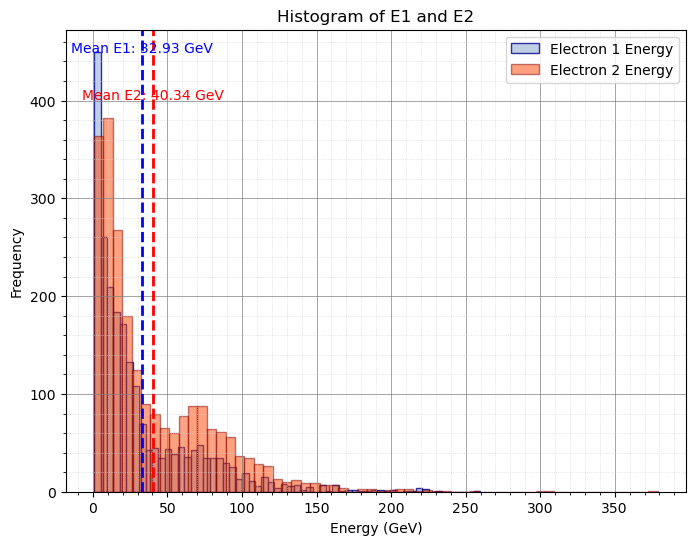

In [41]:
# Visualize the energy distribution for each electron by creating histogram
plt.figure(figsize=(8,6))

plt.hist(data["E1"], bins = 60, color = "lightsteelblue", alpha = 0.8,  label = "Electron 1 Energy", edgecolor = "darkblue")
plt.hist(data["E2"], bins = 60, color = "orangered", alpha = 0.5, label = "Electron 2 Energy", edgecolor = "maroon")
plt.xlabel("Energy (GeV)")
plt.ylabel("Frequency")
plt.title("Histogram of E1 and E2")
plt.legend()

# Adding vertical lines for mean energy values
line_E1 = plt.axvline(mean_E1, color="blue", linestyle="dashed", linewidth=2, label=f"Mean E1: {mean_E1} GeV")
line_E2 = plt.axvline(mean_E2, color="red", linestyle="dashed", linewidth=2, label=f"Mean E2: {mean_E2} GeV")

# Adding text annotations for mean values with adjusted positions
plt.text(mean_E1, 0.95*max(plt.ylim()), f"Mean E1: {mean_E1} GeV", color="blue", fontsize=10, ha="center")
plt.text(mean_E2, 0.85*max(plt.ylim()), f"Mean E2: {mean_E2} GeV", color="red", fontsize=10, ha="center")

# Customizing grids
plt.grid(True, which="major", linestyle="-", linewidth="0.5", color="gray") 
plt.minorticks_on() #turn on the minor ticks
plt.grid(True, which="minor", linestyle=":", linewidth="0.5", color="lightgray")

plt.savefig("Energy distribution.png", dpi=300)

plt.show()


##### Majority of the particles lie on the lower spectrum of energy. Electron 1 tends to have  lower energy in more events and electron 2 tends to ocurr more frequently at given energy values. This is particularly dominant in the region from 40 to almost 150 GeV.

#### 5.2.2. Invariant Mass Distribution 

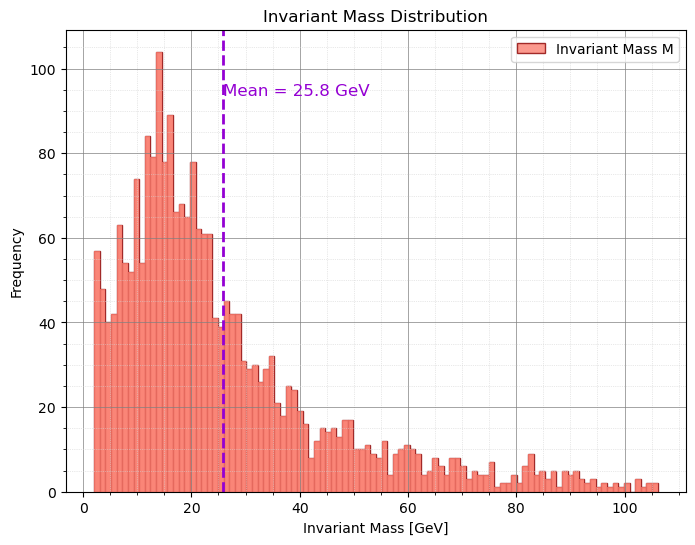

In [37]:
# Visualize distribution of invariant mass (M)
plt.figure(figsize=(8,6))

plt.hist(data["M"], bins = 100, color = "salmon", alpha = 0.8, label = "Invariant Mass M", edgecolor = "darkred", )
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Frequency")
plt.title("Invariant Mass Distribution")
plt.legend()

# Adding a vertical line at the mean
plt.axvline(mean_mass, color="darkviolet", linestyle="dashed", linewidth=2, label=f"Mean = {mean_mass} GeV")

# Adding a text annotation for the mean
plt.text(mean_mass + 0.1, max(plt.hist(data["M"], bins = 100, color = "salmon", alpha = 0.8)[0]) * 0.9, 
         f"Mean = {mean_mass} GeV", color="darkviolet", fontsize=12)

# Customizing grids
plt.grid(True, which="major", linestyle="-", linewidth="0.5", color="gray") 
plt.minorticks_on() #turn on the minor ticks
plt.grid(True, which="minor", linestyle=":", linewidth="0.5", color="lightgray")

plt.savefig("Invariant Mass Distribution.png", dpi=300)

plt.show()

#### 5.2.3. Calculated Event-Based Invarient Mass Distribution

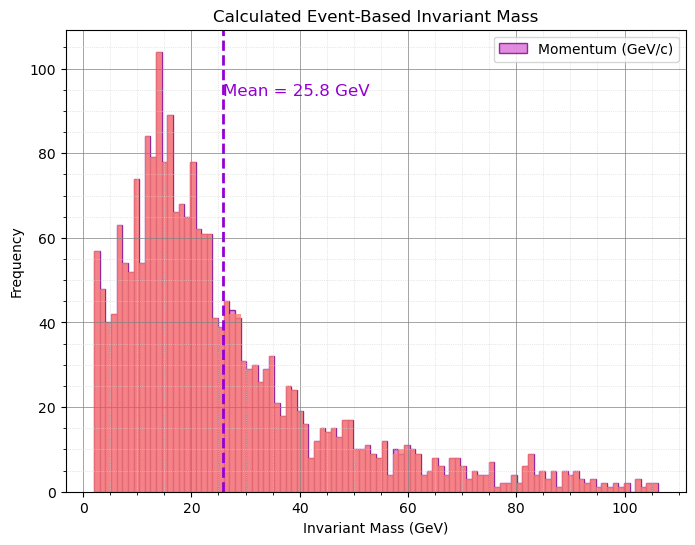

In [49]:
plt.figure(figsize=(8,6))

plt.hist(data["Event_M"], bins=100, color = "orchid", edgecolor = "purple", alpha = 0.8, label = "Momentum (GeV/c)")
plt.xlabel("Invariant Mass (GeV)")
plt.ylabel("Frequency")
plt.title("Calculated Event-Based Invariant Mass")
plt.legend()

# Adding a vertical line at the mean
plt.axvline(mean_mass, color="darkviolet", linestyle="dashed", linewidth=2, label=f"Mean = {mean_mass} GeV")

# Adding a text annotation for the mean
plt.text(mean_mass + 0.1, max(plt.hist(data["M"], bins = 100, color = "salmon", alpha = 0.8)[0]) * 0.9, 
         f"Mean = {mean_mass} GeV", color="darkviolet", fontsize=12)

# Customizing grids
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray') 
plt.minorticks_on() # turn on the minor ticks
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgray')

plt.savefig("Calculated Event-Based Invariant Mass.png", dpi=300)

plt.show()

##### Both mass histograms show potential signs of heavier particles decay especially at frequencies lower than 5. 
##### As expected, the majority of events have lower mass up to about 40 GeV, and the rarest events are those of 80 GeV and above.
##### Since both histograms give almost identical mass distribution, we conclude that the calculation was accurate and fits the actual results.

#### 5.2.3. Transverse Momentum Distribution

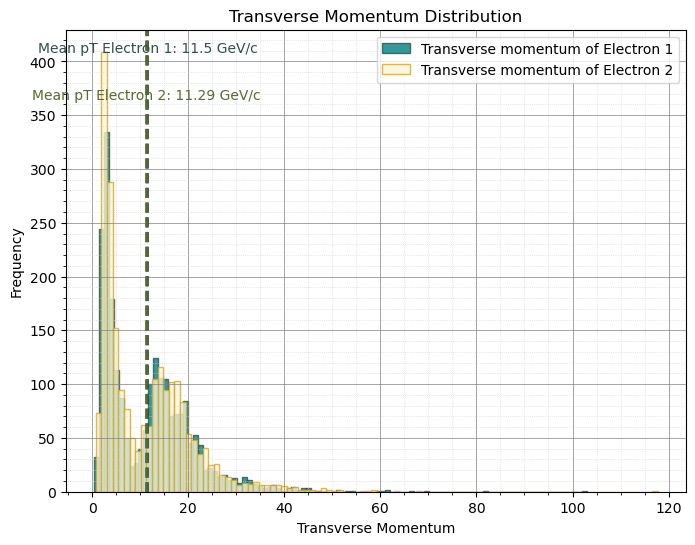

In [35]:
plt.figure(figsize=(8,6))

plt.hist(data["pt1"], bins = 100, color = "teal", edgecolor = "darkslategrey", alpha = 0.8, label = "Transverse momentum of Electron 1")
plt.hist(data["pt2"], bins = 100, color = "beige", edgecolor = "goldenrod", alpha = 0.8, label = "Transverse momentum of Electron 2") 
plt.xlabel("Transverse Momentum") 
plt.ylabel("Frequency") 
plt.title("Transverse Momentum Distribution")
plt.legend()

# Adding vertical lines for mean pt values
plt.axvline(mean_pt1, color="darkslategray", linestyle="dashed", linewidth=2, label=f"Mean pT Electron 1: {mean_pt1} GeV/c")
plt.axvline(mean_pt2, color="darkolivegreen", linestyle="dashed", linewidth=2, label=f"Mean pT Electron 2: {mean_pt2} GeV/c")

# Adding text annotations for mean values
plt.text(mean_pt1, 0.95*max(plt.ylim()), f"Mean pT Electron 1: {mean_pt1} GeV/c", color="darkslategray", fontsize=10, ha="center")
plt.text(mean_pt2, 0.85*max(plt.ylim()), f"Mean pT Electron 2: {mean_pt2} GeV/c", color="darkolivegreen", fontsize=10, ha="center")

# Customizing grids
plt.grid(True, which="major", linestyle="-", linewidth="0.5", color="gray") 
plt.minorticks_on() #turn on the minor ticks
plt.grid(True, which="minor", linestyle=":", linewidth="0.5", color="lightgray")

plt.savefig("Transverse Momentum.png", dpi=300)

plt.show()

##### We can see that the majority of particles fall in the range of transverse momentum from 0 to 10 which is common for soft interactions. Transverse momentum with values over 10 and up to 30 is an indication of some medium energy processes such as Z-boson decay. The much less frequent values are those with momentum higher than 40 which are common for very heavy particles such as Higgs boson.

#### 5.2.4. Momentum Components X,Y and Z for E1 and E2 

##### Visualizing momentum components in 2D using Seaborn Pairplots:

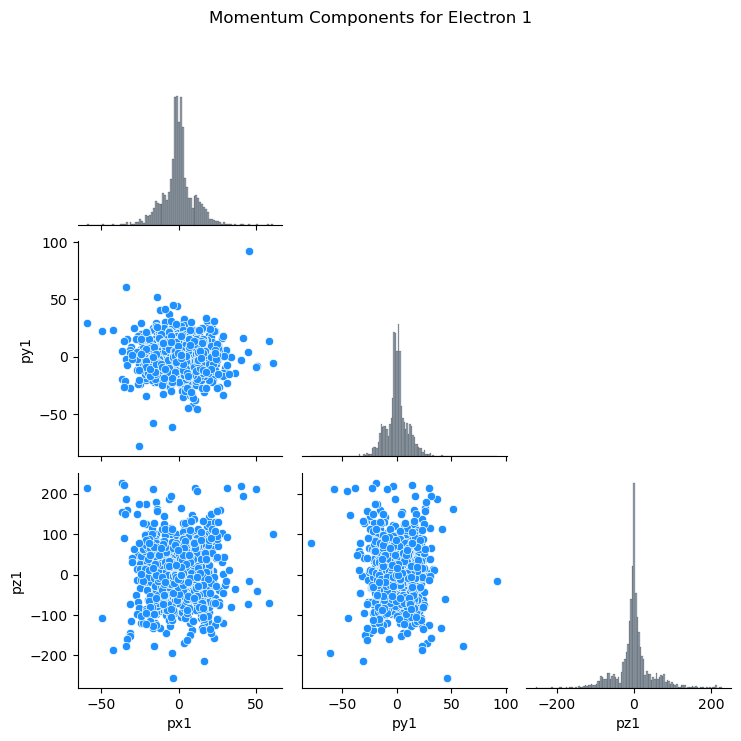

In [46]:
# Pairplot for Electron 1 
sns.pairplot(data[["px1", "py1", "pz1"]], corner = True, diag_kws = {"color":"slategrey"},plot_kws={"color":"dodgerblue"}) # We remove the upper triangle of the pairplot grid  
plt.suptitle("Momentum Components for Electron 1")

plt.savefig("X,Y and Z Momentum Pairplot - E1.png", dpi=300)

plt.show()

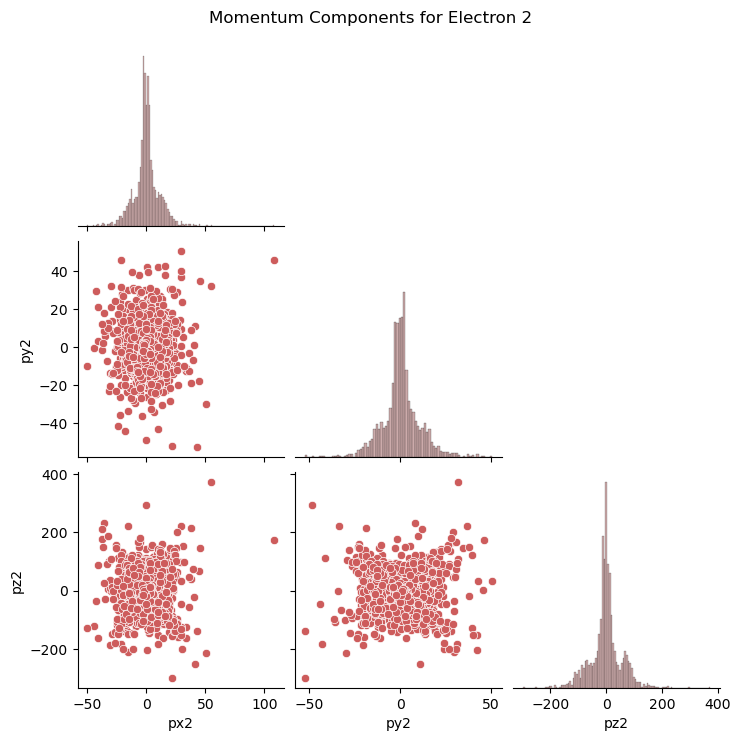

In [45]:
# Pairplot for Electron 2 

sns.pairplot(data[["px2", "py2", "pz2"]], corner = True, plot_kws={"color":"indianred"}, diag_kws = {"color":"rosybrown"}) 
plt.suptitle("Momentum Components for Electron 2") 

plt.savefig("X,Y and Z Momentum Pairplot - E2.png", dpi=300)

plt.show()

##### Creating a 3D plot to inspect correlation between all the three momentum components:

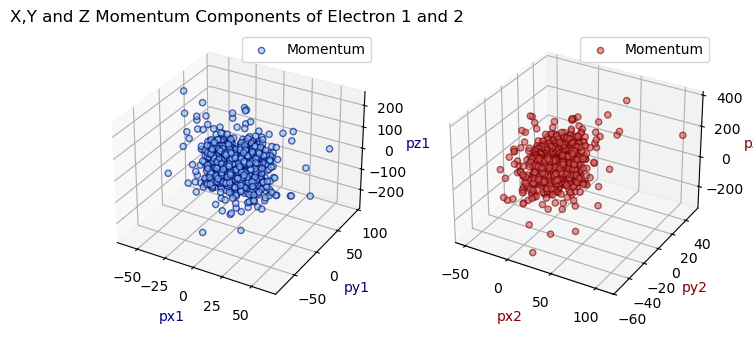

In [51]:
fig = plt.figure(figsize=(8,6))

# Add 3D subplot for Electron 1 
ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(data["px1"], data["py1"], data["pz1"], color = "skyblue", alpha = 0.6, label = "Momentum", edgecolor = "navy")
ax1.set_xlabel("px1", color = "navy")
ax1.set_ylabel("py1", color = "navy")
ax1.set_zlabel("pz1", color = "navy")
ax1.set_title("X,Y and Z Momentum Components of Electron 1 and 2")
ax1.legend()

# Add a 3D plot for Electron 2 as a subplot 
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(data["px2"], data["py2"], data["pz2"], color = "indianred", alpha = 0.6, label = "Momentum", edgecolor = "maroon")
ax2.set_xlabel("px2", color = "maroon")
ax2.set_ylabel("py2", color = "maroon")
ax2.set_zlabel("pz2", color = "maroon")
ax2.legend()

plt.savefig("3D Momentum.png", dpi=300)

plt.show()

##### In the LHC and CMS, the beams of particles collide along z-axis which means that initial momentum is primarily along the z-axis.
##### Because the collisions occur head-on (along the z-axis), there is no preferred direction in the transverse plane (the x-y plane). This leads to a roughly circular or isotropic distribution of momentum in the x-y plane. This is why the "spray" of momentum is generally uniform in all directions.

#### 5.2.5. Correlation heatmap between energy and transverse momentum 

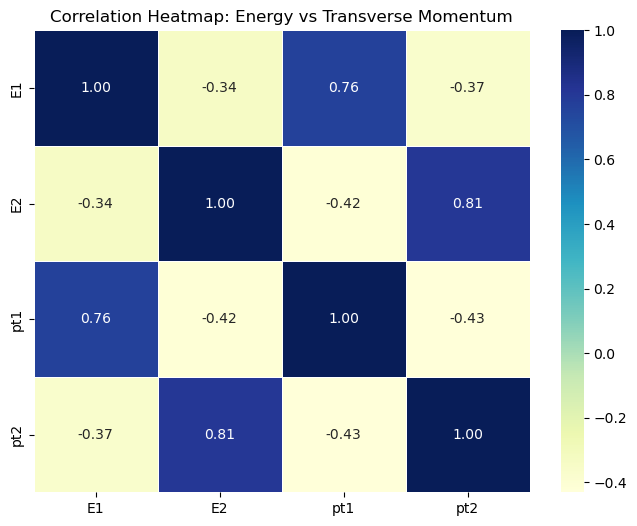

In [47]:
# Select the energy and transverse momentum columns for analysis 
corr_data = data[["E1", "E2", "pt1", "pt2"]]

# Calculate the correlation matrix 
corr_matrix = corr_data.corr()

# Create a heatmap to visualize the matrix 
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = "YlGnBu", fmt =",.2f", linewidths=0.5)
plt.title("Correlation Heatmap: Energy vs Transverse Momentum")

plt.savefig("Energy and Momentum Heatmap.png", dpi=300)

plt.show()

##### Highest correlations (closer to 1) are between energy and the corresponding transverse momentum of each electron (0.81). 
##### The lowest correlations (negative) are between opposing components of the two electrons such as pt1 and pt2, which are of moderate negative trend.
##### This could be interpreted as: increase in pt1 means a decrease in pt2.


#### 5.2.6. Particles' Positions in the CMS Detector 

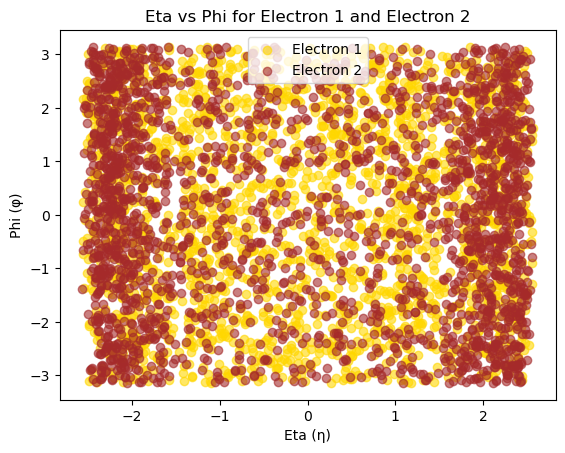

In [48]:
# Scatter plot of eta1 vs phi1 of Electron 1 
plt.scatter(data["eta1"], data["phi1"], color = "gold", alpha = 0.6, label="Electron 1")

# Scatter plot for eta vs phi for Electron 2
plt.scatter(data["eta2"], data["phi2"], color="brown", alpha=0.6, label="Electron 2")

# Add labels and title
plt.xlabel("Eta (η)")
plt.ylabel("Phi (φ)")
plt.title("Eta vs Phi for Electron 1 and Electron 2")
plt.legend()

plt.savefig("Position-E1 and E2.png", dpi=300)

plt.show()

##### Particle production is expected to be uniform in phi due to circular collider symmetry. 
##### As for pseudorapidity (eta), clusters on the end-positive and end-negative sides tell us about the angle of the particles relative to the z-axis.
##### Higher values in eta result in emission of particles closer to the positive end of the beam axis. Negative is dominant for smaller values of eta.

# 6. Conclusion

##### In this analysis, we investigated the properties of electron pairs that are product of intermediate decays of initial proton-proton collisions.We analyzed the invariant mass and transverse momentum distributions of the electrons, as well as the correlation between their transverse momentum. We observed a broad invariant mass distribution with a peak at lower masses (around 10-20 GeV), suggesting a variety of production mechanisms.
##### The transverse momentum distributions showed the expected exponential decrease at high pt, characteristic of QCD (Quantum Chromodynamics) processes. Though we discovered several useful indicators that hard scattering processes did occur, no clear Z boson peak was observed, possibly due to low statistics, background contributions, or the suppressed decay channel. A moderate negative correlation was found between the transverse momenta of the two electrons, consistent with transverse momentum conservation. This analysis is based on a limited dataset, and future work should focus on background estimation, refining event selection, and increasing the statistics to improve the sensitivity to potential signals and further investigate the high mass tail. Including detector effects and systematic uncertainties in the analysis would also improve the precision of the results.

## References 

##### * [CERN Electron Collision Data] (https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data?resource=download)
##### * [CMS Open Data Guide] (https://cms-opendata-guide.web.cern.ch/)
##### * [Pandas Documentation] (https://pandas.pydata.org/docs/)
##### * [Matplotlib Documentation] (https://matplotlib.org/stable/contents.html)
##### * [Calculating the invariant mass] (https://opendata-education.github.io/en_Physics/Exercises-with-open-data/Warming-up/Calculate-invariant-mass.html)
##### *  [Beta Decay] (https://www.sciencedirect.com/topics/chemistry/beta-decay)

## Code Used

##### *This analysis was performed using Python with the following libraries: Pandas, Matplotlib, Seaborn and NumPy* 

## Further Work

##### *Future work could include a more detailed study of the high-mass tail of the invariant mass distribution, including background estimation and comparison to Standard Model predictions.*


## Date

##### December 27, 2024